# Лабороторна робота №1

## 1. Побудуйте гістограму частот появи літер в тексті.

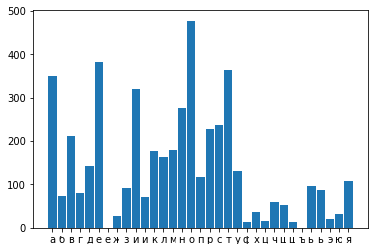

In [6]:
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

dict = {"а":0, "б":0, "в":0, "г":0, "д":0, "е":0, "ё":0, "ж":0, "з":0, "и":0, "й":0, "к":0, "л":0, "м":0, "н":0, "о":0, "п":0, "р":0, "с":0, "т":0, "у":0, "ф":0, "х":0, "ц":0, "ч":0, "ш":0, "щ":0, "ъ":0,"ы":0, "ь":0, "э":0, "ю":0, "я":0}
with open("fight_club.txt", 'r') as fc:
    lines = fc.readlines()
    text = "".join(lines)
text = text.lower()
for key in dict:
    for a in re.finditer(key, text, re.DOTALL):
        dict[key] += 1

ax = plt.axes()
ax.set_xticks(np.arange(len(dict.keys())))
ax.set_xticklabels(dict.keys())

plt.bar(dict.keys(), dict.values(),width=0.9)
plt.show()

## 2. Релізуйте алгоритм шифрування Віженера. 

In [7]:
num0 = {"a":0, "b":1, "c":2, "d":3, "e":4, "f":5, "g":6, "h":7, "i":8, "j":9, "k":10, "l":11, "m":12, "n":13, "o":14, "p":15, "q":16, "r":17, "s":18, "t":19, "u":20, "v":21, "w":22, "x":23, "y":24, "z":25}
num = {"а":0, "б":1, "в":2, "г":3, "ґ":4, "д":5, "є":6, "е":7, "ж":8, "з":9, "и":10, "і":11, "ї":12, "й":13, "к":14, "л":15, "м":16, "н":17, "о":18, "п":19, "р":20, "с":21, "т":22, "у":23, "ф":24, "х":25, "ц":26, "ч":27, "ш":28, "щ":29, "ь":30, "ю":31, "я":32}
Pt = input("Plaintext: ")
Key = input("Keyword: ")
Pt = re.sub(r' ', '', Pt)
Pt = Pt.lower()
Key = Key.lower()

pt, keyword = list(Pt), list(Key)
longkeyword = []
enc = []
j = 0;
for i in range(len(keyword)):
    for key in num:
        if(keyword[i] == key):
            keyword[i] = num[key]
for i in range(len(pt)):
    longkeyword.append(0)
    enc.append(0)
    if(j < len(keyword)):
        longkeyword[i] = keyword[j]
        j += 1
    else:
        j = 0
        longkeyword[i] = keyword[j]
        j += 1
    for key in num:
        if(pt[i] == key):
            pt[i] = num[key]
    if(pt[i]+longkeyword[i] < len(num)): 
        enc[i] = pt[i]+longkeyword[i]
    else:
        enc[i] = pt[i]+longkeyword[i] - len(num)        
    for key in num:
        if(enc[i] == num[key]):
            enc[i] = key
print("Ciphertext: ", ''.join(enc))
# весна красна колись прийде
# зима

Plaintext: весна красна колись прийде
Keyword: зима
Ciphertext:  інґнзфгаьчмкчхцсєщгитлу


## 3. Проведіть криптоаналіз шифру Віженера і розшифруйте запропонований криптотекст 

In [8]:
Ct = input("Ciphertext: ")
Key = input("Keyword: ")
Ct = re.sub(r' ', '', Ct)
Ct = Ct.lower()
Key = Key.lower()

ct, keyword = list(Ct), list(Key)
longkeyword = []
dec = []
j = 0;
for i in range(len(keyword)):
    for key in num:
        if(keyword[i] == key):
            keyword[i] = num[key]
for i in range(len(ct)):
    longkeyword.append(0)
    dec.append(0)
    if(j < len(keyword)):
        longkeyword[i] = keyword[j]
        j += 1
    else:
        j = 0
        longkeyword[i] = keyword[j]
        j += 1
    for key in num:
        if(ct[i] == key):
            ct[i] = num[key]
    if(ct[i]-longkeyword[i] < 0): 
        dec[i] = ct[i] + len(num) - longkeyword[i]
    else:
        dec[i] = ct[i]-longkeyword[i]      
    for key in num:
        if(dec[i] == num[key]):
            dec[i] = key
print("Plaintext: ", ''.join(dec))
# ьччжпчьишисаеяйпявааьяч
# зима

Ciphertext: ьччжпчьишисаеяйпявааьяч
Keyword: зима
Plaintext:  сніжинкипадаютьпухнасті


# Лабороторна робота №2

## 1. Реалiзуйте криптосистему AES-128, включаючи алгоритми утворення раундових ключiв, шифрування i дешифрування.

AES - 128:


Довжина блоку - 128 біт. 


Довжина ключа - 128 біт. 


Кількість раундів - 10. 


Складаеться з чотирьох перетворень SubButes(), SubRows(), MixColumns() та AddRoundKey(). AddRoundKey() використовує попередньо визначений масив KeySchedule, що складається з 11 блоків(ключів) 

## SubButes()


(ENC). Перетворення представляє собою заміну кажного байта із State на відповідний йому із константної таблиці sbox.


(DEC). Працює так само, як і SubBytes(), за виключенням того, що заміни здійснюються із константної таблиці inv_sbox. 

In [9]:
sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

inv_sbox = [
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
]

In [10]:
def SubBytes(state, inv=False):
    if inv == False: # Enc
        box = sbox
    else:   # Dec
        box = inv_sbox
    
    for i in range(len(state)):
        for j in range(len(state[i])):
            
            row = state[i][j] // 0x10
            col = state[i][j] % 0x10
            
            box_el = box[16*row + col]
            state[i][j] = box_el
    return state

## SubRows()


(ENC). Виконує циклічний зсув вліво на 1 елемент для першого рядка, на 2 для другого і на 3 для третього. Нульовий рядок не зсувається. 

(DEC). Виконує циклічний зсув вправо на 1 елемент для першого рядка, на 2 для другого і на 3 для третього. Нульовий рядок не зсувається. 


$(ENC)\begin{bmatrix}
s_{00} & s_{01}  & s_{02} & s_{03}\\
s_{10} & s_{11} & s_{12} & s_{13}\\
s_{20} & s_{21} & s_{22} & s_{23}\\
s_{30} & s_{31} & s_{32} & s_{33}\\
\end{bmatrix}$
$\to$
$\begin{bmatrix}
s_{00} & s_{01}  & s_{02} & s_{03}\\
s_{11} & s_{12} & s_{13} & s_{10}\\
s_{22} & s_{23} & s_{20} & s_{21}\\
s_{33} & s_{30} & s_{31} & s_{32}\\
\end{bmatrix}$
$               $
$(DEC)\begin{bmatrix}
s_{00} & s_{01}  & s_{02} & s_{03}\\
s_{10} & s_{11} & s_{12} & s_{13}\\
s_{20} & s_{21} & s_{22} & s_{23}\\
s_{30} & s_{31} & s_{32} & s_{33}\\
\end{bmatrix}$
$\to$
$\begin{bmatrix}
s_{00} & s_{01}  & s_{02} & s_{03}\\
s_{13} & s_{10} & s_{11} & s_{12}\\
s_{22} & s_{23} & s_{20} & s_{21}\\
s_{31} & s_{32} & s_{33} & s_{30}\\
\end{bmatrix}$

In [11]:
def ShiftRows(state, inv=False):
    count = 1
    if inv == False: # Enc
        for i in range(1, 4):
            state[i] =  totheLEFT(state[i], count)
            count += 1
    else: # Dec
        for i in range(1, 4):
            state[i] =  totheRIGHT(state[i], count)
            count += 1
    return state

def totheLEFT(arr, count):
    res = arr[:]
    for i in range(count):
        tmp = res[1:]
        tmp.append(res[0])
        res[:] = tmp[:]
    return res

def totheRIGHT(arr, count):
    res = arr[:]
    for i in range(count):
        tmp = res[:-1]
        tmp.insert(0, res[-1])
        res[:] = tmp[:]
    return res

## MixColumns()


(ENC). Кожна колонка в State подається у вигляді многочлена і перемножується в полі $GF(2^8)$ по модулю $x^4+ 1$ з фіксованим многочленом $3x^3 + x^2 + x + 2$. 


$\begin{bmatrix}
s_{0c}^\prime\\
s_{1c}^\prime\\
s_{2c}^\prime\\
s_{3c}^\prime\\
\end{bmatrix}$
$=$
$\begin{bmatrix}
02&03&01&01\\
01&02&03&01\\
01&01&02&03\\
03&01&01&02
\end{bmatrix}$
$\begin{bmatrix}
s_{0c}\\
s_{1c}\\
s_{2c}\\
s_{3c}\\
\end{bmatrix}$


(DEC). Операції ті самі, але кажна колонка State множиться з іншим многочленом $\{0b\}x^3 + \{0d\}x^2 + \{09\}x + \{0e\}$. 


$\begin{bmatrix}
s_{0c}^\prime\\
s_{1c}^\prime\\
s_{2c}^\prime\\
s_{3c}^\prime\\
\end{bmatrix}$
$=$
$\begin{bmatrix}
0e&0b&0d&09\\
09&0e&0b&0d\\
0d&09&0e&0b\\
0b&0d&09&0e
\end{bmatrix}$
$\begin{bmatrix}
s_{0c}\\
s_{1c}\\
s_{2c}\\
s_{3c}\\
\end{bmatrix}$


$\bullet$ Додавання в полі $GF(2^8)$ эквивалентноеквівалентне операции XOR.


$\bullet$ Множення на {01} не змінює множник.


$\bullet$ Множення на {02} відбувається за правилом: якщо множник меньше {80}, він зсувається вліво на 1 біт. Якщо множник більше або рівний {80}, він зпочатку зсувається вліво на 1 біт, а потім до результату зсуву застосовується операція XOR з значенням {1b}. Результат може перескочити за значение {ff}, тобто за границі одного байта. В такому випадку потрібно повернути остачу від ділення результату на {100}.


$\bullet$ Множення на інші константи можна виразити через попередні. 



In [12]:
def MixColumns(state, inv=False):
    for i in range(4):
        if inv == False: # Enc
            s0 = mul02(state[0][i]) ^ mul03(state[1][i]) ^ state[2][i]        ^ state[3][i]
            s1 = state[0][i]        ^ mul02(state[1][i]) ^ mul03(state[2][i]) ^ state[3][i]
            s2 = state[0][i]        ^ state[1][i]        ^ mul02(state[2][i]) ^ mul03(state[3][i])
            s3 = mul03(state[0][i]) ^ state[1][i]        ^ state[2][i]        ^ mul02(state[3][i])
        else: # Dec
            s0 = mul0e(state[0][i]) ^ mul0b(state[1][i]) ^ mul0d(state[2][i]) ^ mul09(state[3][i])
            s1 = mul09(state[0][i]) ^ mul0e(state[1][i]) ^ mul0b(state[2][i]) ^ mul0d(state[3][i])
            s2 = mul0d(state[0][i]) ^ mul09(state[1][i]) ^ mul0e(state[2][i]) ^ mul0b(state[3][i])
            s3 = mul0b(state[0][i]) ^ mul0d(state[1][i]) ^ mul09(state[2][i]) ^ mul0e(state[3][i])

        state[0][i] = s0
        state[1][i] = s1
        state[2][i] = s2
        state[3][i] = s3
    return state

def mul02(num):
    if num < 0x80:
        res = (num << 1)
    else:
        res = (num << 1) ^ 0x1b
    return res % 0x100

def mul03(num):
    return (mul02(num) ^ num)

def mul09(num):
    return mul02(mul02(mul02(num))) ^ num

def mul0b(num):
    return mul02(mul02(mul02(num))) ^ mul02(num) ^ num

def mul0d(num):
    return mul02(mul02(mul02(num))) ^ mul02(mul02(num)) ^ num

def mul0e(num):
    return mul02(mul02(mul02(num))) ^ mul02(mul02(num)) ^ mul02(num)

## AddRoundKey()


Обчислює побітовий XOR State з раундовим ключем із KeySchedule.


#### KeyExpansion()


Формує набір раундових ключів — KeySchedule. KeySchedule представляє собою таблицу, що складається з 4*11 столбців або 11 блоков, кажний із яких рівний розміру State. Перший раундовий ключ заповнюється на основі секретного ключа.




In [13]:
rcon = [[0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36],
        [0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00],
        [0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00],
        [0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00]
]

def AddRoundKey(state, KeySchedule, round=0):
        
    for i in range(4):
        s0 = state[0][i] ^ KeySchedule[0][4*round + i]
        s1 = state[1][i] ^ KeySchedule[1][4*round + i]
        s2 = state[2][i] ^ KeySchedule[2][4*round + i]
        s3 = state[3][i] ^ KeySchedule[3][4*round + i]

        state[0][i] = s0
        state[1][i] = s1
        state[2][i] = s2
        state[3][i] = s3
    return state

def KeyExpansion(key):
    tm = [0x00 for i in range(16)] 
    KeySymbols = list(key)
    for i in range(len(KeySymbols)):
        tm[i] = hex(int(text_to_bits(KeySymbols[i]),2))
    KeySymbols = tm

    KeySchedule = [[] for i in range(4)]     
    for i in range(4):
        for j in range(4):
            KeySchedule[i].append(KeySymbols[i + 4*j])
    
            
    for col in range(4, 4 * 11): 
        if col % 4 == 0:
            #<< 1
            tmp = [KeySchedule[row][col-1] for row in range(1, 4)]
            tmp.append(KeySchedule[0][col-1])
            #Sbox
            for j in range(len(tmp)):        
                sbox_row = tmp[j] // 0x10
                sbox_col = tmp[j] % 0x10
                sbox_el =  sbox[16*sbox_row + sbox_col]
                tmp[j] = sbox_el
            #XOR
            for row in range(4):
                s = KeySchedule[row][col - 4] ^ tmp[row] ^ rcon[row][col//4 - 1]
                KeySchedule[row].append(s)

        else:
            for row in range(4):
                s = KeySchedule[row][col - 4] ^ KeySchedule[row][col - 1]
                KeySchedule[row].append(s)

    return KeySchedule

![ENC](/Users/feofanova.alisa/Desktop/enc.jpg)



Процес розшифровування відбуваеться у зворотньому порядку. 

In [14]:
def Enc(state, key):       
    KeySchedule = KeyExpansion(key)
    
    state = AddRoundKey(state, KeySchedule)

    for round in range(1, 10):
        state = SubBytes(state)
        state = ShiftRows(state)
        state = MixColumns(state)
        state = AddRoundKey(state, KeySchedule, round)

    state = SubBytes(state)
    state = ShiftRows(state)
    state = AddRoundKey(state, KeySchedule, 10)

    return Output(state)

def Dec(state, key):
    KeySchedule = KeyExpansion(key)
    
    state = AddRoundKey(state, KeySchedule, 10)

    round = 9
    while round >= 1:
        state = ShiftRows(state, inv=True)
        state = SubBytes(state, inv=True)
        state = AddRoundKey(state, KeySchedule, round)
        state = MixColumns(state, inv=True)
        round -= 1

    state = ShiftRows(state, inv=True)
    state = SubBytes(state, inv=True)
    state = AddRoundKey(state, KeySchedule)

    return Output(state)


In [15]:
hex_to_int = {'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15}

def text_to_bits(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int.from_bytes(text.encode(encoding, errors), 'big'))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

def text_from_bits(bits, encoding='utf-8', errors='surrogatepass'):
    n = int(bits, 2)
    return n.to_bytes((n.bit_length() + 7) // 8, 'big').decode(encoding, errors) or '\0'   

def Initialization(text):
    tm = [0x00 for i in range(16)] 
    input_bytes = list(text)
    for i in range(len(input_bytes)):
        tm[i] = int(text_to_bits(input_bytes[i]),2)
    input_bytes = tm

    state = [[] for j in range(4)]
    for i in range(4):
        for j in range(4):
            state[i].append(input_bytes[i + 4*j])   
    return state

def Output(state):
    output = [None for i in range(16)]
    text = ''
    for i in range(4):
        for j in range(4):
            output[i + 4*j] = state[i][j]
    for i in range(len(output)):
        text += chr(output[i])
    return text


message = input('message: ')
key = input('key: ')
message = re.sub(r' ', '', message.lower())
key = re.sub(r' ', '', key.lower())


cipher = Enc(Initialization(message),key)

text = Dec(Initialization(cipher), key)

print('Ciphertext: ', cipher)
print('Plaintext: ', text)

message: hello world
key: aes128


TypeError: unsupported operand type(s) for ^: 'str' and 'int'

## 2. Як змiнюється криптотекст, якщо у початковому вiдкритому текстi змiнити один бiт?


In [17]:
# def InitializationWithChange(text):
#     tm = [0x00 for i in range(16)] 
#     input_bytes = list(text)
#     for i in range(len(input_bytes)):
#         tm[i] = int(text_to_bits(input_bytes[i]),2)
#     tm[0] = tm[0] ^ 1
#     input_bytes = tm
# 
#     state = [[] for j in range(4)]
#     for i in range(4):
#         for j in range(4):
#             state[i].append(input_bytes[i + 4*j]) 
    
#     return state


# message = input('message: ')
# key = input('key: ')

# cipher = Enc(Initialization(message),key)
# cipher1 = Enc(InitializationWithChange(message),key)


# print('Ciphertext without changes: ', cipher)
# print('Ciphertext with changes: ', cipher1)

## 3. Реалiзуйте потоковi режими CBC та CTR криптосистеми AES-128.

# Лабороторна робота №4

## 1. Реалiзуйте тест простоти Мiллера-Рабiна.

In [2]:
import random, math

def MillerRabinTest(n):
    rnd = int(math.log2(n))
    if n == 2 or n == 3:
        return True 
    if n%2==0:
        return False
    tmp = n-1
    s = 0
    while tmp%2==0:
        tmp /= 2
        s += 1
    t = (n-1)/2**s
    for i in range(rnd):
        a = random.randint(2, n-2)
        x = (a**t)%n
        if  x != 1 or x != n-1:
            j = 0
            while j<s and x != n-1:
                x = (x**2)%n
                if x==1: return False
                j += 1
            if x != n-1: return False
    return True 
    
print(MillerRabinTest(17))

True


## 2. Реалiзуйте алгоритм iнiцiалiзацiї RSA.

In [12]:
def GCD(a,b):
    while a != 0 and b != 0:
        if a > b:
            a %= b
        else:
            b %= a
    gcd = a + b
    return gcd

p = 4
q = 4
while not(MillerRabinTest(p)):
    p = random.randint(2, 100)
while not(MillerRabinTest(q)):
    q = random.randint(2, 100)
n = p*q
Euler = (p-1)*(q-1)
e = random.randint(1, Euler)
while GCD(e, Euler) != 1:
    e = random.randint(1, Euler)
# d = (e**(-1))%Euler
d = 0
while d*e%Euler != 1:
    d = random.randint(1, Euler)

print('Public key: ', e)
print('Public parameter: ', n)
print('Secret key: ', d)

Public key:  319
Public parameter:  1261
Secret key:  1087


## 3. Реалiзуйте алгоритм шифрування RSA.

In [15]:
m = random.randint(0,n)
while GCD(m, n) != 1:
    m = random.randint(0,n)
c = m**e%n

print('Plaintext: ',m)
print('Ciphertext: ',c) 

Plaintext:  1054
Ciphertext:  833


## 4. Реалiзуйте алгоритм дешифрування RSA.

In [18]:
dec = c**d%n
print('Ciphertext: ',c) 
print('Plaintext: ',dec)

Ciphertext:  833
Plaintext:  1054
